# Week 49

In [1]:
try:
    import fysisk_biokemi
    print("Already installed")
except ImportError:
    %pip install -q "fysisk_biokemi[colab] @ git+https://github.com/au-mbg/fysisk-biokemi.git"

------------------------------------------------------------------------

## Design of an enzyme kinetics experiment (Unfinished)

In [2]:
import matplotlib.pyplot as plt

In the Excel document tø12_week49_data you will find a data set in which
an enzyme catalyzed formation of product P, with varying start
concentration of substrates, \[S\], was followed over time. The product
absorbs light at a specific wavelength with an extinction coefficient of
0.068 $\mu\text{M}^{-1}\cdot \text{cm}^{-1}$, and the absorbance was
measured in a light path of 1 cm throughout the time course.

You can load the dataset using the cells below;

In [3]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [4]:
df = uploader.get_dataframe()
display(df)

In [5]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('week49_1') # Load from package for the solution so it doesn't require to interact.
display(df)

The headers, like `Abs_S1` refer to the substrate concentration so `S1`
means a substrate concentration of 1 $\mu\text{M}$.

#### (a)

Convert the extinction coefficient to units given in
$\text{M}^{-1}\cdot \text{cm}^{-1}$ and assign it to a variable. Also
assign the light path length to a variable.

In [7]:
ext_coeff = 0.068 / 10**(-6) # 1/(M cm)
l = 1 # cm

#### (b) Calculate concentrations

Using Lambert-Beers law, calculate the concentration of product, \[P\],
in M for each time series.

> **Loops**
>
> Loops are one of the most useful parts of programming, loops allows us
> to repeat an operation on many different elements. This allows us to
> not have to repeat code many times, making it simpler to understand
> and less prone to error - and at the same time more flexible.
>
> A common type of loop in Python is the `for` loop, which does
> something `for` every item it is told to consider. The syntax of a
> `for`-loop is like so:
>
> ``` python
> total = 0
> for count in [1, 2, 3, 4, 5]:
>     print(f"I have {count} apples.")
> ```
>
> Which will print
>
>     I have 1 apples
>     I have 2 apples
>     I have 3 apples
>     I have 4 apples
>     I have 5 apples
>
> So the `for`-loop did the operation of printing a string for each
> value of `count`.
>
> When working with a `DataFrame` like in this exercise, we may for
> example want to do something `for` each column, one way of doing that
> is to loop over the column names, say we want we have a `DataFrame`
> `df` with columns named `"col1", "col2", "col3"` we can loop over that
> as
>
> ``` python
> for name in ['col1', 'col2', 'col3']
>     df[name] = ... # Some operation
> ```

The cell below setups a loop calculate the concentrations for each of
these current columns in the dataframe.

In [9]:
substrate_concentrations = [1, 3, 5, 7, 9, 11, 13, 15]
for s in substrate_concentrations:
    abs_col_name = f'Abs_S{s}' # This creates a string where the value of 's' is put instead of "{s}"".
    conc_col_name = f'C_S{s}' # Same type string creation 
    df[conc_col_name] = df[abs_col_name] / (ext_coeff * l)
    print(s, abs_col_name, conc_col_name)

1 Abs_S1 C_S1
3 Abs_S3 C_S3
5 Abs_S5 C_S5
7 Abs_S7 C_S7
9 Abs_S9 C_S9
11 Abs_S11 C_S11
13 Abs_S13 C_S13
15 Abs_S15 C_S15

And we can check that the columns we expect have been added to the
`DataFrame`.

In [11]:
display(df)

#### (c) Plot

Plot \[P\] as a function of time for all experiments in one single
graph.

Here it is again very useful to use a `for`-loop

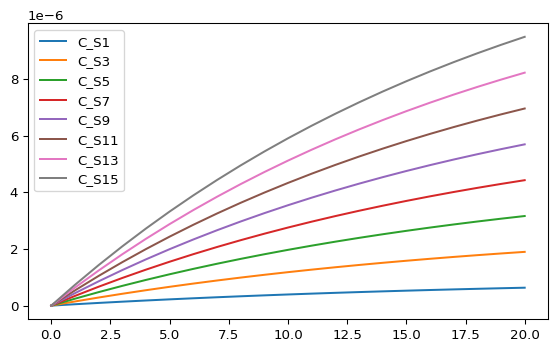

In [12]:
fig, ax = plt.subplots(figsize=(7, 4))

x_axis = df['time_(s)']
substrate_concentrations = [1, 3, 5, 7, 9, 11, 13, 15]
for s in substrate_concentrations:
    conc_col_name = f'C_S{s}'
    y_axis = df[conc_col_name]

    ax.plot(x_axis, y_axis, label=conc_col_name)

ax.legend()    

#### (d)

How could you use Excel to determine $V_0$ for each concentration of
$S$? Create a table of $V_0$ vs $[S]$

#### (e)

Why is it important to use $V_0$ rather than $V$ at a later time point
when creating the Michaelis-Menten plot?

#### (f)

Plot $V_0$ against substrate concentration and estimate $k_{cat}$ and
$K_M$ visually (remember units)

------------------------------------------------------------------------

## Analysis of a data set obeying Michaelis-Menten kinetics (Unfinished)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
pd.set_option('display.max_rows', 6)

The kinetics for an enzyme were investigated using the absorbance of the
product to calculate the initial velocities for a range of different
initial concentrations of the substrate. The data given in the dataset
`week49_2.xlsx` was obtained. Use these data to answer the following
questions.

In [14]:
from fysisk_biokemi.widgets import DataUploader
from IPython.display import display 
uploader = DataUploader()
uploader.display()

Run the next cell **after** uploading the file

In [15]:
df = uploader.get_dataframe()
display(df)

In [16]:
from IPython.display import display 
from fysisk_biokemi.datasets import load_dataset
df = load_dataset('week49_2') # Load from package for the solution so it doesn't require to interact.
display(df)

39 rows × 2 columns

#### (a) SI Units

Convert the concentrations of substrate and the velocities to the SI
units $\text{M}$ and $\text{M}\cdot\text{s}^{-1}$, respectively.

In [18]:
df['[S]_(M)'] = df['[S]_(mM)'] * 10**(-3)
df['V0_(M/s)'] = df['V0_(uM/s)'] * 10**(-6)
display(df)

39 rows × 4 columns

#### (b) Plot & estimate

Plot the initial velocities, $V_0$, as a function of substrate
concentrations, $[S]$. Estimate $K_M$ and $V_\mathrm{max}$ from this
plot.

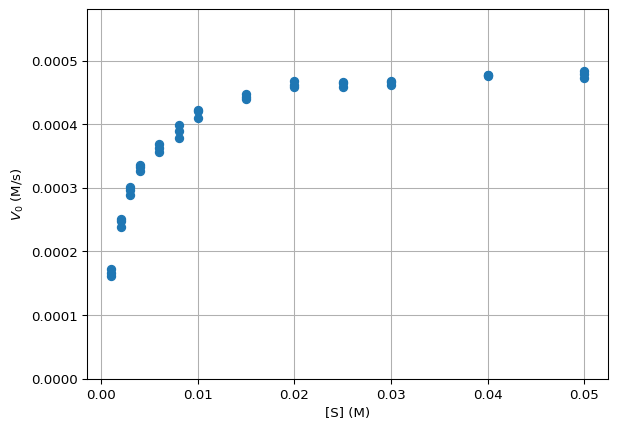

In [20]:
fig, ax = plt.subplots()
ax.plot(df['[S]_(M)'], df['V0_(M/s)'], 'o')
ax.set_xlabel('[S] (M)')
ax.set_ylabel('$V_0$ (M/s)')
ax.grid('on')
ax.set_ylim(0, df['V0_(M/s)'].max()*1.2)

#### (c) Fit

Now we want to fit using the Michaelis-Menten equation, as per usual
when the task is fitting we have to define the function we are fitting
with

In [22]:
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)

And then we can follow our usual procedure to make the fit

In [24]:
x_data = df['[S]_(M)']
y_data = df['V0_(M/s)']

popt, pcov = curve_fit(michaelis_menten, x_data, y_data)
Vmax, Km = popt

print(f"{Vmax = :03f}")
print(f"{Km = :03f}")

Vmax = 0.000501
Km = 0.002086

How do these values compare to your estimate?

#### (d)

The kcat of the enzyme was determined to be $20000 \ \text{s}^{-1}$.
Calculate the concentration of the enzyme used in the assay.